### Logistic Regression Work
Used logistic Regression to explore data and create a benchmark model
1. Created a model without oversampling
2. Created model with oversampling
3. Compared the Key Metrics for each model: ROC AUC, Recall
4. Reviwed Confusion matrix for each model. 
    - With oversampling recall score greatly improved 
    - With oversampling more customers were being correctly identified as churning

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from ipywidgets import interactive, FloatSlider

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score, auc, roc_curve

import imblearn.over_sampling

%matplotlib inline

In [64]:
data = pd.read_csv('/Users/jennihawk/Documents/Data Science Projects/Churn Project/Models/chatr_clean.csv')

In [65]:
data.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,InternetService_Fiber,InternetService_No,Contract_One_Year,Contract_Two_year,PaymentMethod_Crcard,...,DeviceProtection_No_internet_serv,DeviceProtection_Yes,TechSupport_No_internet_serv,TechSupport_Yes,StreamingTV_No_internet_serv,StreamingTV_Yes,StreamingMovies_No_internet_serv,StreamingMovies_Yes,PaperlessBilling_Yes,Churn_Yes
0,7590-VHVEG,0,1.0,29.85,29.85,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,34.0,56.95,1889.50,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3668-QPYBK,0,2.0,53.85,108.15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,7795-CFOCW,0,45.0,42.30,1840.75,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2.0,70.70,151.65,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [66]:
#data.info()

In [67]:
data.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'InternetService_Fiber', 'InternetService_No',
       'Contract_One_Year', 'Contract_Two_year', 'PaymentMethod_Crcard',
       'PaymentMethod_Electr_Check', 'PaymentMethod_Mailed_check',
       'MultipleLines_No_phone_serv', 'MultipleLines_Yes', 'Dependents_Yes',
       'gender_Male', 'Partner_Yes', 'PhoneService_Yes',
       'OnlineSecurity_No_internet_serv', 'OnlineSecurity_Yes',
       'OnlineBackup_No_Internet_Serv', 'OnlineBackup_Yes',
       'DeviceProtection_No_internet_serv', 'DeviceProtection_Yes',
       'TechSupport_No_internet_serv', 'TechSupport_Yes',
       'StreamingTV_No_internet_serv', 'StreamingTV_Yes',
       'StreamingMovies_No_internet_serv', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'Churn_Yes'],
      dtype='object')

### Model Setup

In [68]:
y = data['Churn_Yes']
X = data.drop(['Churn_Yes', 'customerID'], axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = Pipeline([('scaler', StandardScaler()), ('LogReg', LogisticRegression())])

# fit logistic regression to training data
pipe.fit(X_train, y_train)  

Pipeline(steps=[('scaler', StandardScaler()), ('LogReg', LogisticRegression())])

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5274, 30)
(1758, 30)
(5274,)
(1758,)


### Churn Target Column
27% churn

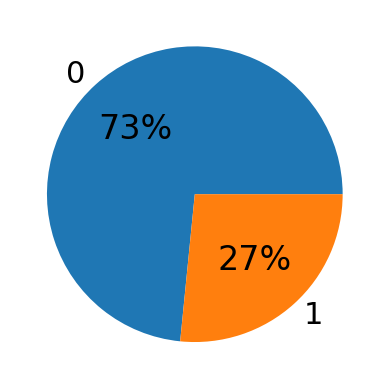

In [70]:
unique, counts = np.unique(y, return_counts=True)
plt.pie(counts, labels=unique, autopct='%.0f%%');

### Churn on Test + Train Data
- parity in test and train
- 1 to 3 ratio (26% have a one / 74% zero)

In [71]:
np.mean(y_train)

0.26753886992794845

In [72]:
np.mean(y_test)

0.2605233219567691

### ROC AUC
How well does the model classify observations

In [73]:
y_pred = pipe.predict_proba(X_test)[:,1] #soft class predictions
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

ROC AUC score =  0.8344776620759153


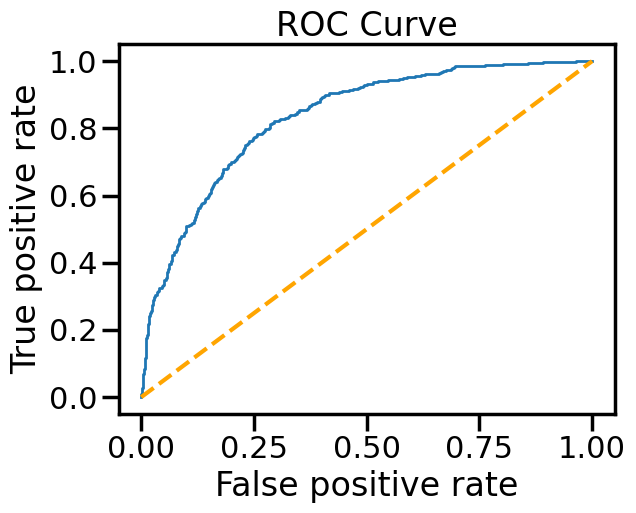

In [74]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='orange',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve');
print("ROC AUC score = ", roc_auc_score(y_test, y_pred))
#plt.savefig('ROC Curve.png', dpi=300) 

#### Confusion Matrix

In [75]:
sns.set_context("poster")

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


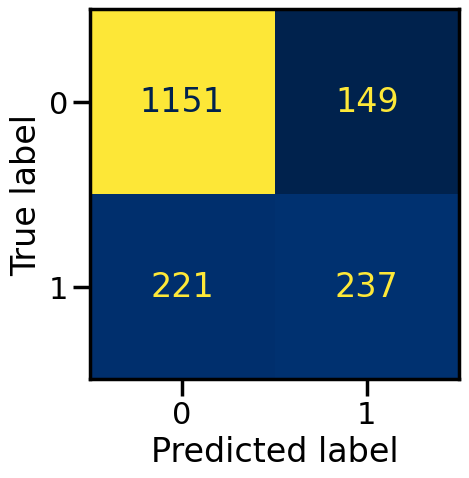

In [76]:
disp = plot_confusion_matrix(pipe, X_test, y_test, cmap = 'cividis', colorbar=False)

#### Confusion matrix findings:
- correctly classified 1151 people who didn't cancel their subscription. 
- correctly classified 237 customers as people who did cancel their subscription.
- incorrectly classified  149 customers as cancelled their subscription when they actually kept their subscription. 
- It incorrectly classified 221 customers as people who kept their subscription but actually canceled it. 

#### Hard Class Predictions (No Oversample Train Data)
Predict Churn / Not Churn

In [80]:
y_pred = pipe.predict(X_test)

#### Results for No Oversample Train Data


In [115]:
print("Default treshold:")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

Default treshold:
Precision: 0.6139896373056994
Recall: 0.517467248908297
F1: 0.5616113744075829


### Coefficient For Each Feature: Which features are more strongly associated with churn?

#### Coeffcients in Log Odds Units

In [116]:
#.T to transform cuz there was a shape error
coefs_tst_data = pd.DataFrame(pipe['LogReg'].coef_.T, X.columns, columns = ['Coeff_Log_Odds'])

In [117]:
#coefs_tst_data.sort_values(by='Coeff_Log_Odds', ascending = False)

#### Coeffecients: Exponentiate to get rid of log odds
These are now odds NOT log odds

In [118]:
coefs_tst_data['Coeff_Odds'] = coefs_tst_data['Coeff_Log_Odds']

In [119]:
#coefs_tst_data

In [120]:
coefs_tst_data['Coeff_Odds'] = coefs_tst_data['Coeff_Odds'].apply(lambda x: np.exp(x))

In [121]:
#add another column to this dataframe and call it absolute coefficient. Understand ultimately importance contains signal! Just as valualbe is not 1 as it is to say it is 1. 
#Tenure has strongest signal means the longer you're with us the less likely you are to churn. 
#TotalCharges .74 is close to 1 churn
#long tenure means not churning. that's why it's important. 
#EDA / Visualization on box plot where x is churn yes and y is tenure. x is churn yes y is total charges. 
coefs_tst_data.sort_values(by='Coeff_Odds', ascending = False)

,Coeff_Log_Odds,Coeff_Odds
TotalCharges,0.746655,2.109930
InternetService_Fiber,0.600124,1.822345
StreamingMovies_Yes,0.195780,1.216259
StreamingTV_Yes,0.173457,1.189409
MultipleLines_Yes,0.131167,1.140158
PaymentMethod_Electr_Check,0.123118,1.131018
PaperlessBilling_Yes,0.114826,1.121679
SeniorCitizen,0.090125,1.094311
Partner_Yes,0.047038,1.048162
MultipleLines_No_phone_serv,0.042894,1.043827


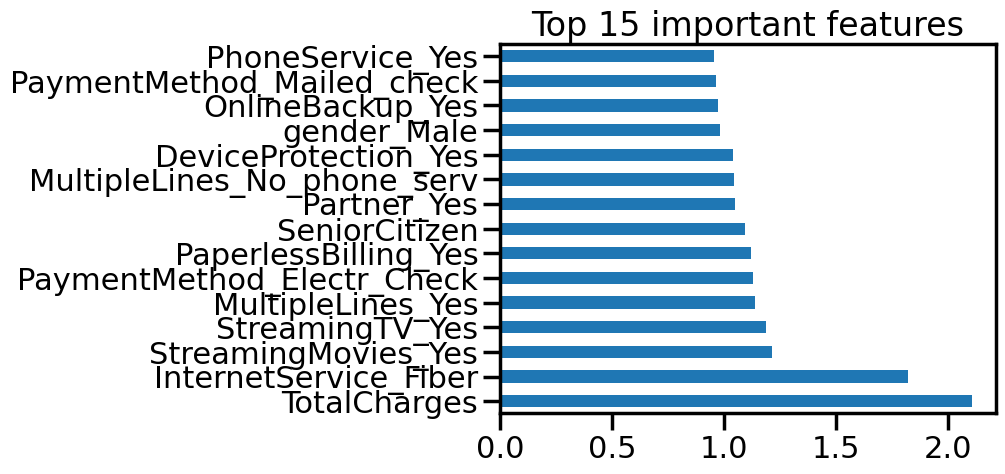

In [123]:
feat_importances = pd.Series(coefs_tst_data.Coeff_Odds, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
#plt.savefig("LogReg_FeaturesImg.png", format="png", dpi=300)
plt.show()

### Oversampled Model

#### Setup Oversampling on the Training Data
- Only oversample training dataset. 
- Validation and test sets still represent the same type of data you'd see in real world. That is validation and test data should still have the same majority/minority ratio that you would expect to actually find in practice.

- Used 3x positive samples. Rationale: We have 3 to 1 ratio of negative to positive observations.

In [82]:
# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 3, 0 : n_neg} 

# randomly oversample positive samples: create 4x as many 
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42) 

#use the fit_sample method to create the dataset with a desired proportion
#the variables X_tr_rs, y_tr_rs hold the training data with the extra samples we just created
X_tr_oversample, y_tr_oversample = ROS.fit_resample(X_train, y_train)


/opt/anaconda3/lib/python3.9/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (4233) in class 1 will be larger than the number of samples in the majority class (class #0 -> 3863)
  warnings.warn(


#### Setup Oversample model 

In [83]:
#instantiate logistic regression model with Pipeline
pipe_oversample = Pipeline([('scaler', StandardScaler()), ('LogReg', LogisticRegression())])

In [84]:
print(type(pipe_oversample))

<class 'sklearn.pipeline.Pipeline'>


#### Fit model on the oversampled training data

In [85]:
pipe_oversample.fit(X_tr_oversample, y_tr_oversample)

Pipeline(steps=[('scaler', StandardScaler()), ('LogReg', LogisticRegression())])

#### Hard Class Predictions on Oversampling -  results are on the test data

In [86]:
y_pred_oversample = pipe_oversample.predict(X_test)
y_pred_oversample

array([0, 0, 1, ..., 1, 1, 0])

#### Soft Class Predictions on Oversample

In [87]:
y_prob_train = pipe_oversample.predict_proba(X_test)
y_prob_test = pipe_oversample.predict_proba(X_train)

#### Confusion Matrix

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


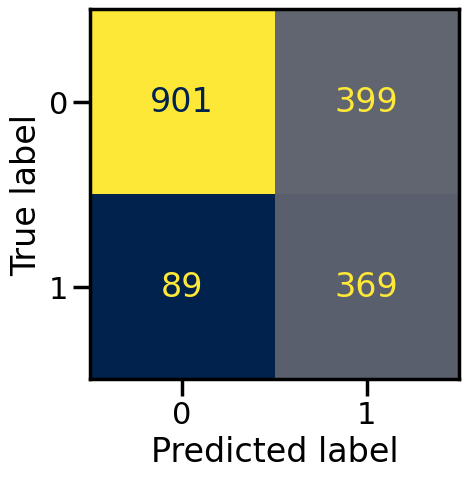

In [88]:
disp = plot_confusion_matrix(pipe_oversample, X_test, y_test, cmap = 'cividis', colorbar=False)

#### AUC On Oversampled Train data - results are on the test set

In [89]:
#use predict_proba to return the probability of being in the positive class for our test set
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_oversample)
auc_oversamp = round(metrics.roc_auc_score(y_test, y_pred_oversample), 4)

In [90]:
auc_oversamp

0.7494

#### Metrics Oversampled Train Data - results are on the test set

In [91]:
print("Default threshold:")
print(f"Precision: {precision_score(y_test, y_pred_oversample)}")
print(f"Recall: {recall_score(y_test, y_pred_oversample)}")
print(f"F1: {f1_score(y_test, y_pred_oversample)}")

Default threshold:
Precision: 0.48046875
Recall: 0.8056768558951966
F1: 0.601957585644372
